<a href="https://colab.research.google.com/github/CanKemaloglu/GlobalAiHubProjects/blob/main/Proje2_GlobalAIHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proje 2

(Dataset Linki: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores )

** Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

** 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.


** İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

** 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

** 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? 
Görselleştirerek ifade ediniz.

** Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

** IMDB puanı en yüksek olan ilk 10 film hangileridir?

** IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

** IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

** 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

** Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

** Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

** Hangi yılın toplam "runtime" süresi en fazladır?

** Her bir dilin en fazla kullanıldığı "Genre" nedir?

** Veri setinde outlier veri var mıdır? Açıklayınız.


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df_ = pd.read_csv("/content/NetflixOriginals.csv", encoding = "ISO-8859-1")
df = df_.copy()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width',1000)

**About Dataset**

Context

This dataset consists of all Netflix original films released as of June 1st, 2021. Additionally, it also includes all Netflix documentaries and specials. The data was webscraped off of this Wikipedia page, which was then integrated with a dataset consisting of all of their corresponding IMDB scores. IMDB scores are voted on by community members, and the majority of the films have 1,000+ reviews.

Content
Included in the dataset is:

Title of the film

Genre of the film

Original premiere date

Runtime in minutes

IMDB scores (as of 06/01/21)

Languages currently available (as of 06/01/21)

In [3]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### MissingValues #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T)


In [4]:
check_df(df)

##################### Shape #####################
(584, 6)
##################### Types #####################
Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object
##################### Head #####################
             Title                  Genre           Premiere  Runtime  IMDB Score          Language
0  Enter the Anime            Documentary     August 5, 2019       58        2.50  English/Japanese
1      Dark Forces               Thriller    August 21, 2020       81        2.60           Spanish
2          The App  Science fiction/Drama  December 26, 2019       79        2.60           Italian
3   The Open House        Horror thriller   January 19, 2018       94        3.20           English
4      Kaali Khuhi                Mystery   October 30, 2020       90        3.40             Hindi
##################### Tail #####################
                                           Titl

In [5]:
df["Runtime"].mean()

93.57705479452055

In [23]:
## Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.
long_runtime = df[(df["Runtime"] > (df["Runtime"].mean()))].groupby("Language").agg({"Runtime": "count"}).sort_values(by = "Runtime", ascending= False)
long_runtime.reset_index(inplace=True)
#long_runtime.sort_values(by = "Runtime", ascending= False)
long_runtime

,Language,Runtime
0,English,232
1,Hindi,32
2,Spanish,18
3,French,12
4,Italian,10
5,Portuguese,9
6,Indonesian,7
7,Korean,5
8,Japanese,4
9,Turkish,4


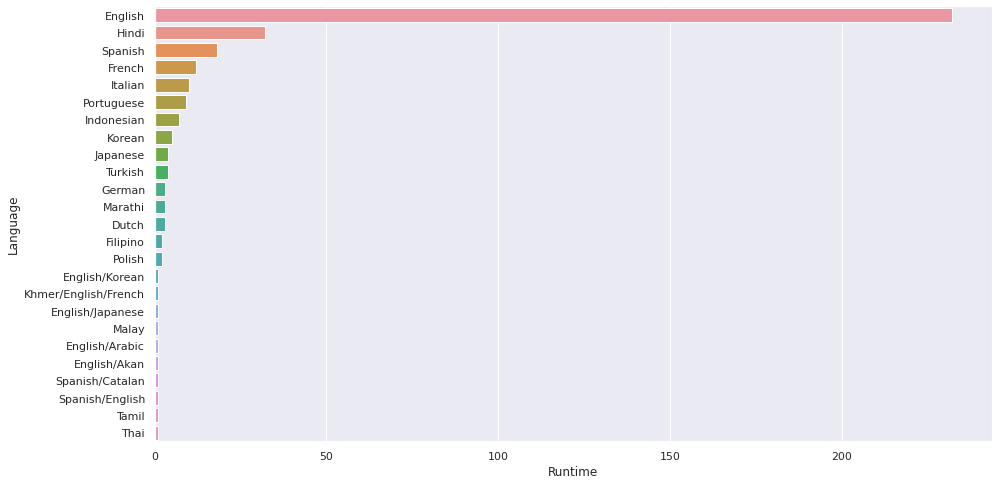

In [51]:
plt.figure(figsize=(15,8))
#plt.barh(long_runtime["Language"], long_runtime["Runtime"])
ax = sns.barplot(x="Runtime", y="Language", data=long_runtime)


In [ ]:
## 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.
df["Premiere"] = df["Premiere"].apply(pd.to_datetime)

df[(df["Premiere"] >= "2019, 1, 1" ) & (df["Premiere"] <= "2020, 6, 30")  & (df["Genre"] == "Documentary")].sort_values(by = "Premiere")


,Title,Genre,Premiere,Runtime,IMDB Score,Language
510,ReMastered: Massacre at the Stadium,Documentary,2019-01-11,64,7.30,English/Spanish
482,Fyre: The Greatest Party That Never Happened,Documentary,2019-01-18,97,7.20,English
511,ReMastered: The Two Killings of Sam Cooke,Documentary,2019-02-08,64,7.30,English
524,Period. End of Sentence.,Documentary,2019-02-12,26,7.40,English/Hindi
324,Antoine Griezmann: The Making of a Legend,Documentary,2019-03-21,60,6.50,French
444,ReMastered: The Miami Showband Massacre,Documentary,2019-03-22,70,7.00,English
286,The Legend of Cocaine Island,Documentary,2019-03-29,87,6.30,English
536,Homecoming: A Film by Beyonce,Documentary,2019-04-17,137,7.50,English
554,Brene Brown: The Call to Courage,Documentary,2019-04-19,76,7.70,English
462,Grass Is Greener,Documentary,2019-04-20,97,7.10,English


In [ ]:
## İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?
df[df["Language"] == "English"].sort_values(by = "IMDB Score", ascending = False).head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.00,English,2020
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.50,English,2018
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.40,English,2018
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.40,English,2020
577,Dancing with the Birds,Documentary,2019-10-23,51,8.30,English,2019


In [ ]:
## 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?
df[(df["Language"] == "Hindi")].agg({"Runtime" : "mean"})
##df.groupby("Language").agg({"Runtime" : "mean"})

Runtime   115.79
dtype: float64

In [ ]:
## 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.
df["Genre"].nunique()


115

In [ ]:
print("######################################")
df["Genre"].values

In [52]:
## Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.
#Most_Popular_Langs = df.groupby("Language").agg({"Language": "count"})
#Most_Popular_Langs.columns = ["Lang Count"]
##Most_Popular_Langs.head()
#Most_Popular_Langs.sort_values(by = "Lang Count", ascending = False).head(3)

df["Language"].value_counts(sort=True)[0:3]

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

In [ ]:
## IMDB puanı en yüksek olan ilk 10 film hangileridir?
df.sort_values("IMDB Score", ascending = False)[:10]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.00,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.60,Portuguese
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.50,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.40,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.40,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.40,English
577,Dancing with the Birds,Documentary,2019-10-23,51,8.30,English
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.30,English
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.20,English
571,13th,Documentary,2016-10-07,100,8.20,English


In [57]:
import plotly.express as px
top_10_ratings = df.sort_values(by="IMDB Score", ascending=False)[0:10]
fig = px.scatter(top_10_ratings, y= 'Title', x='IMDB Score', color='Genre', 
                 title = "Top 10 High Rated Programs")

fig.show()

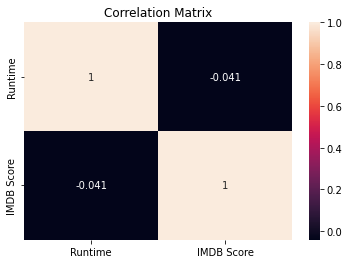

In [ ]:
## IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

plt.title('Correlation Matrix')
sns.heatmap(df.corr(), annot=True)

In [63]:
## IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.
top_ten_genre = df.groupby("Genre").agg({"IMDB Score" : "max"}).sort_values(by = "IMDB Score", ascending = False)[:10].reset_index()
fig = px.scatter(top_ten_genre, y= 'Genre', x='IMDB Score', color='Genre', 
                 title = "Top 10 High Rated Genres")

fig.show()

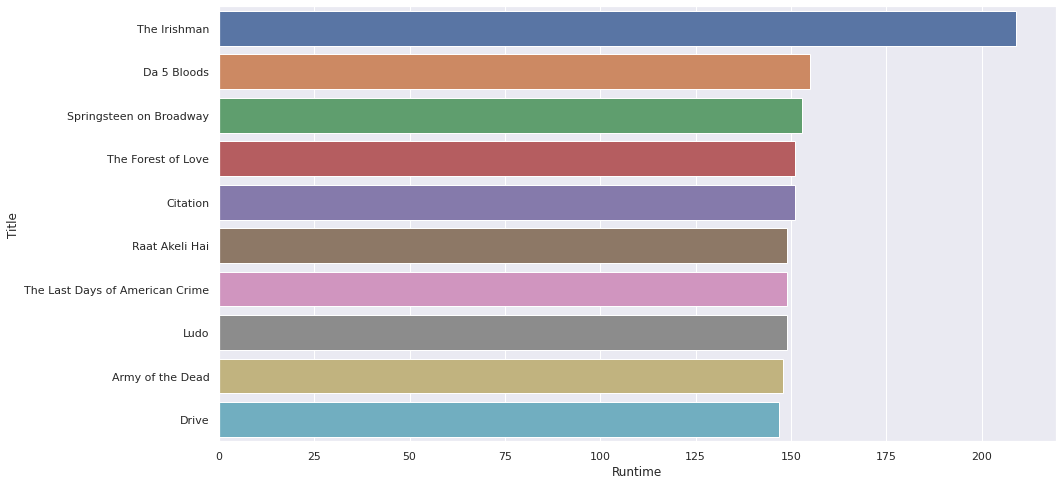

In [71]:
## 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.
top_ten_runtime = df.groupby("Title").agg({"Runtime": "max"}).sort_values(by = "Runtime", ascending = False)[:10].reset_index()
plt.figure(figsize=(15,8))
#plt.barh(long_runtime["Language"], long_runtime["Runtime"])
sns.barplot(x="Runtime", y="Title", data=top_ten_runtime)


In [ ]:
## Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

#df.groupby("Premiere").agg({"Title" : "count"}).sort_values(by = "Title", ascending = False)[:10]

In [80]:
df['year'] = pd.DatetimeIndex(df['Premiere']).year
df["year"].value_counts(sort=True)

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: year, dtype: int64

In [85]:
movie_counts_by_year = df.groupby("year").agg({"Title" : "count"}).sort_values(by = "Title", ascending = False)[:10].reset_index()
fig = px.scatter(movie_counts_by_year, y= 'Title', x='year', 
                 title = "movie_counts_by_year")

fig.show()

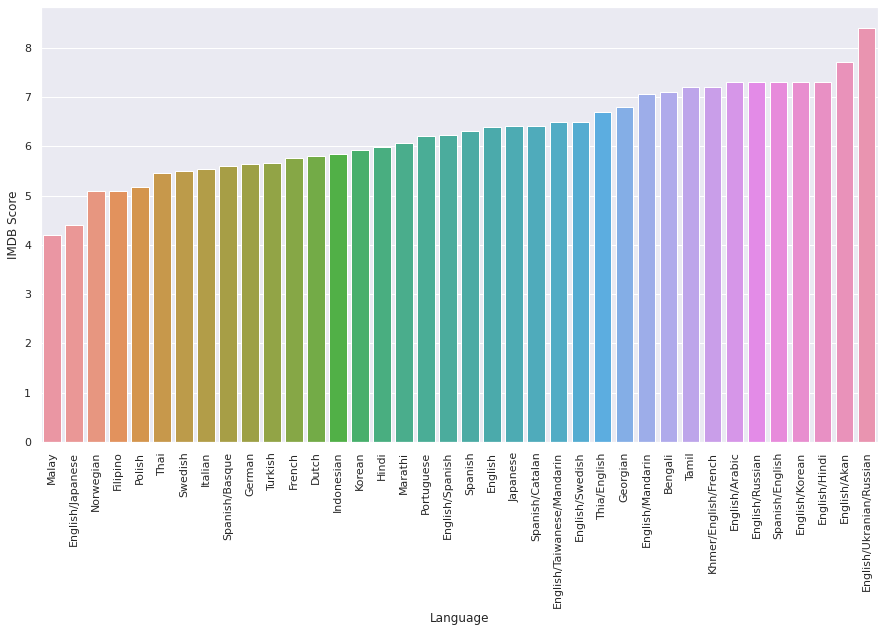

In [92]:
## Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.
df.groupby("Language").agg({"IMDB Score" : "mean"}).sort_values(by = "IMDB Score").head().reset_index()
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x="Language", y="IMDB Score", data=df.groupby("Language").agg({"IMDB Score" : "mean"}).sort_values(by = "IMDB Score").reset_index())

In [ ]:
## Hangi yılın toplam "runtime" süresi en fazladır?
df.groupby("year").sum("Runtime").sort_values(by = "Runtime", ascending = False)

,Runtime,IMDB Score
year,,
2020,17384,1133.70
2019,10856,782.40
2018,9405,629.70
2021,7214,429.30
2017,6129,423.90
2016,2766,195.40
2015,814,61.90
2014,81,6.40


In [93]:
# Outlier Analysis
# 15. Veri setinde outlier veri var mıdır? Açıklayınız.

def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
    # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)


def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    print(col, check_outlier(df, col, 0.1, 0.9))

print("conclusion: As a result of the output of the functions that perform outlier analysis with the extreme values determined in the data set, no outliers observed.")

Runtime False
IMDB Score False
year False
conclusion: As a result of the output of the functions that perform outlier analysis with the extreme values determined in the data set, no outliers observed.
